In [1]:
# import numpy as np
# from PIL import Image
# import time
# # import functools

# import os
# import pandas as pd

# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV

# from sklearn.feature_selection import SelectKBest

# from sklearn.metrics import mean_squared_error

# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble.partial_dependence import plot_partial_dependence
# from sklearn.ensemble.partial_dependence import partial_dependence

# from sklearn import svm
# from sklearn import tree
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC

# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.decomposition import PCA
# from sklearn.pipeline import Pipeline
# from sklearn.pipeline import make_pipeline
# from sklearn.pipeline import FeatureUnion
# from sklearn.externals import joblib

# from sklearn.preprocessing import LabelBinarizer
# from sklearn.preprocessing import MultiLabelBinarizer



# import xgboost as xgb



In [2]:
from PIL import Image
import time
import functools
import os
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff

plotly.offline.init_notebook_mode(connected=True)

In [256]:
#os.chdir(dir)
#os.listdir()

In [206]:
df = pd.read_csv("Credit_Card.csv")

print(df.shape)

(30000, 25)


In [208]:
rand_vars = ['rand_var1','rand_var2','rand_var3','rand_var4','rand_var5','rand_var6',
            'rand_var11','rand_var12','rand_var13','rand_var14','rand_var15','rand_var16',
            'rand_var21','rand_var22','rand_var23','rand_var24','rand_var25','rand_var26',
            'rand_var31','rand_var32','rand_var33','rand_var34','rand_var35','rand_var36']

for var in rand_vars:
    df[var] = np.random.randint(1, 45, df.shape[0])
    
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'rand_var1', 'rand_var2', 'rand_var3',
       'rand_var4', 'rand_var5', 'rand_var6', 'rand_var11', 'rand_var12',
       'rand_var13', 'rand_var14', 'rand_var15', 'rand_var16', 'rand_var21',
       'rand_var22', 'rand_var23', 'rand_var24', 'rand_var25', 'rand_var26',
       'rand_var31', 'rand_var32', 'rand_var33', 'rand_var34', 'rand_var35',
       'rand_var36'],
      dtype='object')

In [209]:
from sklearn.model_selection import train_test_split

# Modeling
outcome_var = 'default.payment.next.month'
#outcome_var = 'species'
X_full = df.drop([outcome_var],axis =1)
y_full = df[outcome_var]

(X_train, X_test, y_train, y_test) = train_test_split(X_full, y_full, test_size=0.20, random_state=42)

In [220]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_un, y, id_rus = rus.fit_sample(X_train, y_train)

# X_un = X_train.copy()
# y = y_train.copy()

# print('Removed indexes:', id_rus)

In [221]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler(quantile_range=(25, 75))

X = X_un.copy()
X = rs.fit_transform(X)

ss = StandardScaler()
X = ss.fit_transform(X)


In [247]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
  
names = list(X_full.columns)
  
lasso_model = Lasso(alpha=.02)
lasso = lasso_model.fit(X, y)

print("R-squared: ",lasso.score(X, y))

R-squared:  0.13299238128485857


In [248]:
model_coef = pd.DataFrame(lasso.coef_, columns = ['Coef'])
model_coef['Feature'] = names
model_coef.reindex(model_coef.Coef.abs().sort_values(ascending=False).index)

model_coef_sig = model_coef[model_coef.Coef != 0]
model_coef_sig


,Coef,Feature
1,-0.024125,LIMIT_BAL
5,0.002206,AGE
6,0.130300,PAY_0
7,0.013793,PAY_2
8,0.013758,PAY_3
12,-0.016455,BILL_AMT1
18,-0.007438,PAY_AMT1


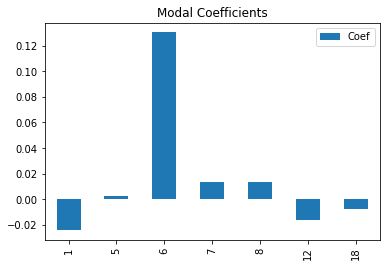

In [249]:
#checking the magnitude of coefficients

model_coef_sig.plot(kind='bar', title='Modal Coefficients')

In [251]:
X_test_std = rs.transform(X_test)
X_test_std = ss.transform(X_test_std)

lasso.score(X_test_std, y_test)

-0.2454322243081699

In [252]:
y_pred = lasso.predict(X_test_std)

pd.crosstab(y_test, y_pred > .5)

col_0,False,True
default.payment.next.month,,
0,3513,1174
1,509,804


In [253]:
import numpy as np
from sklearn.metrics import accuracy_score

t = .5
dec_range = np.linspace(0,1,21)


for i in dec_range:
    print(i, " Threshold Accuracy: ",accuracy_score(y_test, y_pred > i))
#accuracy_score(y_test, y_pred > t, normalize=False)

0.0  Threshold Accuracy:  0.21883333333333332
0.05  Threshold Accuracy:  0.21883333333333332
0.1  Threshold Accuracy:  0.219
0.15000000000000002  Threshold Accuracy:  0.2195
0.2  Threshold Accuracy:  0.231
0.25  Threshold Accuracy:  0.2775
0.30000000000000004  Threshold Accuracy:  0.2976666666666667
0.35000000000000003  Threshold Accuracy:  0.34933333333333333
0.4  Threshold Accuracy:  0.43666666666666665
0.45  Threshold Accuracy:  0.5316666666666666
0.5  Threshold Accuracy:  0.7195
0.55  Threshold Accuracy:  0.7931666666666667
0.6000000000000001  Threshold Accuracy:  0.8116666666666666
0.65  Threshold Accuracy:  0.8185
0.7000000000000001  Threshold Accuracy:  0.8086666666666666
0.75  Threshold Accuracy:  0.7881666666666667
0.8  Threshold Accuracy:  0.7853333333333333
0.8500000000000001  Threshold Accuracy:  0.7826666666666666
0.9  Threshold Accuracy:  0.7808333333333334
0.9500000000000001  Threshold Accuracy:  0.7808333333333334
1.0  Threshold Accuracy:  0.7811666666666667


In [255]:
pd.crosstab(y_test, y_pred > .55)

col_0,False,True
default.payment.next.month,,
0,4129,558
1,683,630
